# 1. Bibliotecas

In [38]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import glob

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem import RSLPStemmer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /Users/andre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/andre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/andre/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

# 2. Lenda dados dos tweets dos influencer

In [51]:
path = "../data/influencer_tweets/"

csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df_influencer_tweets   = pd.concat(df_list, ignore_index=True)

# 2.1 Limpeza de dados 
### Removendo dados repetidos

In [52]:
print(df_influencer_tweets.shape) # antes de remover duplicados
df_influencer_tweets = df_influencer_tweets.drop_duplicates().drop_duplicates(subset=['id'])
df_influencer_tweets.shape

(392800, 6)


(595, 6)

# 2.2 Verificando os dados dos 3 influencer

In [10]:
df_influencer_tweets.head()

,id,userID,created_at,full_text,favorite_count,retweet_count
0,1646187917507801088,Cellbit,2023-04-12 16:25:58+00:00,@spot_desenhador canon,7076,495
1,1644048620897857554,Cellbit,2023-04-06 18:45:10+00:00,@Little_No_One @OrdemParanormal não é essa! \n...,1494,28
2,1638136315270053888,Cellbit,2023-03-21 11:11:47+00:00,o personagem de Ordem que eu mais escrevi sobr...,29593,1594
3,1633689544376688641,Cellbit,2023-03-09 04:41:54+00:00,@gabicattuzzo ?????,10144,139
4,1633526191150751745,Cellbit,2023-03-08 17:52:48+00:00,"@makotices Oi, tudo bem? vi sua postagem e alg...",10337,744


In [12]:
df_influencer_tweets.groupby(("userID")).count()

,id,created_at,full_text,favorite_count,retweet_count
userID,,,,,
BRKsEDU,498,498,498,498,498
Cellbit,1239,1239,1239,1239,1239
Loiranoob,456,456,456,456,456


# 2.3 Word cloud dos textos sem limpeza

In [18]:
grouped_data = df_influencer_tweets.groupby('userID')

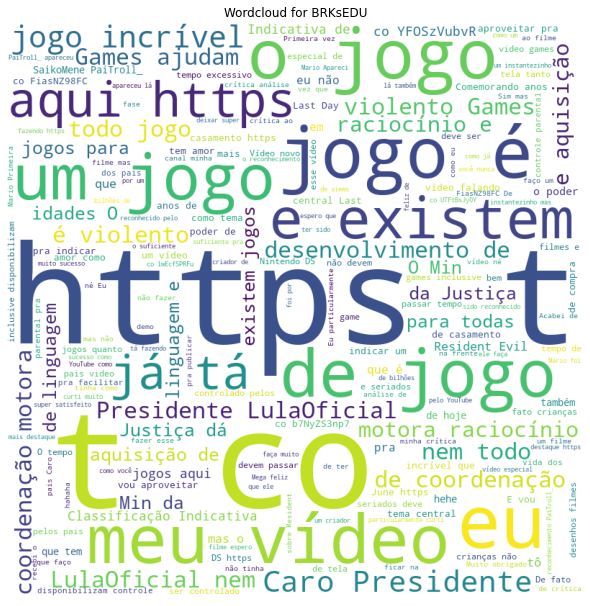

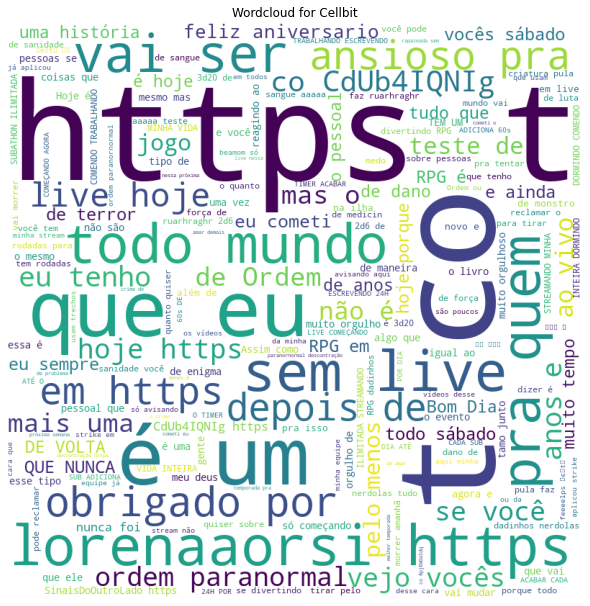

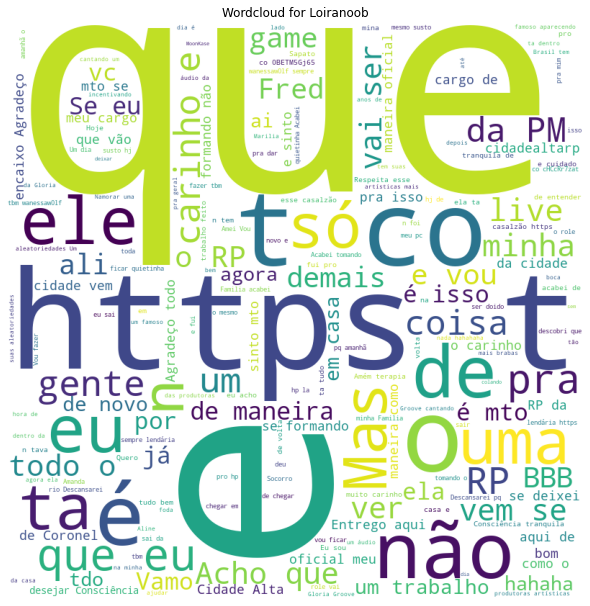

In [19]:
for group_name, group in grouped_data:
    text = ' '.join(group['full_text'].tolist())
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Wordcloud for {group_name}")
    plt.show()


# 2.4 Word Cloud dos textos com limpezas
## aplicadas remocao de stopwords

In [25]:

# Definir a lista de stopwords em português
stop_words = set(stopwords.words('portuguese'))


# Definir o stemmer e o lemmatizer para o idioma português
stemmer = SnowballStemmer('portuguese')
lemmatizer = WordNetLemmatizer()

# Tokenizar o texto e aplicar a limpeza
def preprocess_text(text):
    # Tokenizar o texto
    tokens = word_tokenize(text.lower(), language='portuguese')

    # Remover stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Realizar stemming
    tokens = [stemmer.stem(token) for token in tokens]

    # Realizar lematização
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Juntar os tokens em uma única string
    clean_text = ' '.join(tokens)

    return clean_text

# Aplicar a limpeza em cada texto da coluna 'full_text'
df_influencer_tweets['clean_text'] = df_influencer_tweets['full_text'].apply(preprocess_text)

In [29]:
df_influencer_tweets[['full_text','clean_text']]

,full_text,clean_text
0,@spot_desenhador canon,@ spot_desenh canon
1,@Little_No_One @OrdemParanormal não é essa! \n...,@ little_no_on @ ordemparanormal ! adatapçã pr...
2,o personagem de Ordem que eu mais escrevi sobr...,personag ordem escrev sobr últim 3 ano nunc me...
3,@gabicattuzzo ?????,@ gabicattuzz ? ? ? ? ?
4,"@makotices Oi, tudo bem? vi sua postagem e alg...","@ makotic oi , tud bem ? vi postag algum respo..."
...,...,...
342232,@beamom só avisando aqui: minha equipe já apli...,@ beamom avis aqu : equip aplic strik tod víd ...
342375,ansioso pra junho,ansios pra junh
377536,E vou aproveitar pra indicar um jogo incrível ...,vou aproveit pra indic jog incrível amor tem c...
377537,De fato crianças não devem passar tempo excess...,fat crianc dev pas temp excess gam . temp tel ...


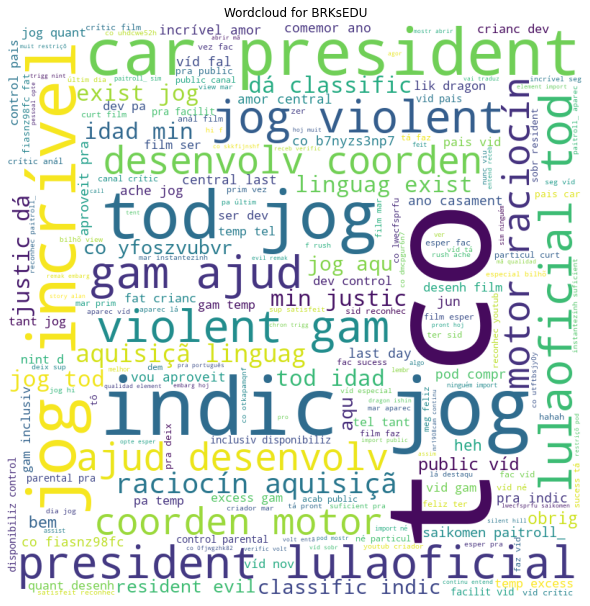

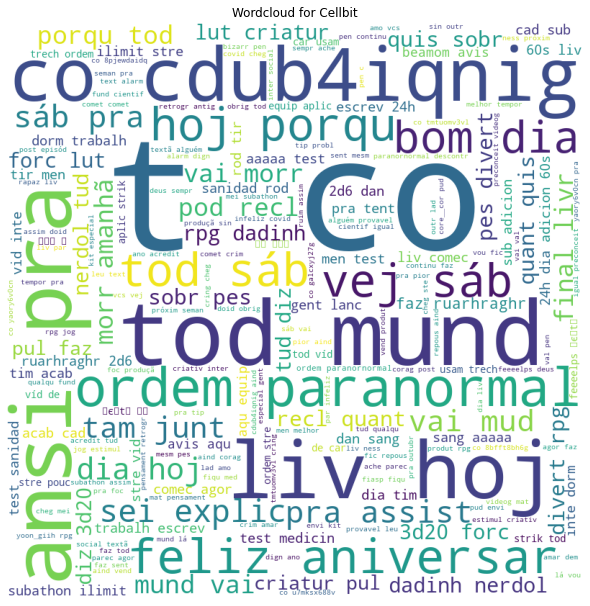

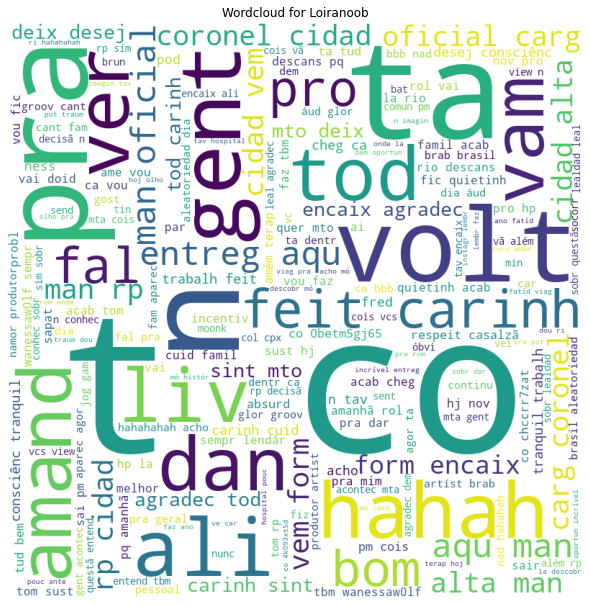

In [27]:
grouped_data = df_influencer_tweets.groupby('userID')

for group_name, group in grouped_data:
    text = ' '.join(group['clean_text'].tolist())
    preprocessed_text = preprocess_text(text)
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(preprocessed_text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Wordcloud for {group_name}")
    plt.show()


# 2.5 Verificacao das palavras mais utilizadas

In [36]:
def get_top_words(group_text, n=10, min_length=4):
    # Tokenize the text
    tokens = word_tokenize(group_text)
    
    # Remove stopwords
    stopwords_list = stopwords.words('portuguese')
    tokens = [token for token in tokens if token not in stopwords_list]
    
    # Lemmatize the tokens
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Filter out words with length less than min_length
    tokens = [token for token in tokens if len(token) >= min_length]
    
    # Count the frequency of each word
    word_freq = nltk.FreqDist(tokens)
    
    # Get the n most common words
    top_words = word_freq.most_common(n)
    
    return top_words


grouped_data = df_influencer_tweets.groupby('userID')

for group_name, group in grouped_data:
    text = ' '.join(group['full_text'].tolist())
    preprocessed_text = preprocess_text(text)
    top_words = get_top_words(preprocessed_text, n=10)
    print(f"Top 10 words for {group_name}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")
    # wordcloud = WordCloud(width=800, height=800, background_color='white').generate(preprocessed_text)
    # plt.figure(figsize=(8, 8), facecolor=None)
    # plt.imshow(wordcloud)
    # plt.axis("off")
    # plt.tight_layout(pad=0)
    # plt.title(f"Wordcloud for {group_name}")
    # plt.show()

Top 10 words for BRKsEDU:
http: 348
film: 38
indic: 32
nint: 31
public: 28
exist: 28
aparec: 27
temp: 27
control: 26
lulaofic: 26
Top 10 words for Cellbit:
http: 311
lorenaa: 70
mund: 69
nunc: 65
pess: 64
aind: 61
obrig: 59
volt: 58
temp: 56
orgulh: 50
Top 10 words for Loiranoob:
http: 123
gent: 49
coil: 33
volt: 33
sobr: 32
mane: 26
carinh: 24
cidad: 23
encaix: 22
brasil: 21


# 2.6 Bigramas mais comuns nos textos

In [39]:
def get_collocations(group_text, n=5, min_length=4):
    # Tokenize the text
    tokens = word_tokenize(group_text.lower())
    
    # Remove stopwords
    stopwords_list = stopwords.words('portuguese')
    tokens = [token for token in tokens if token not in stopwords_list]
    
    # Lemmatize the tokens
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Filter out words with length less than min_length
    tokens = [token for token in tokens if len(token) >= min_length]
    
    # Get the most common bigrams and trigrams
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens)
    finder.apply_freq_filter(2)
    bigrams = finder.nbest(bigram_measures.raw_freq, n)
    
    trigram_measures = TrigramAssocMeasures()
    finder = TrigramCollocationFinder.from_words(tokens)
    finder.apply_freq_filter(2)
    trigrams = finder.nbest(trigram_measures.raw_freq, n)
    
    return bigrams, trigrams

In [48]:
grouped_data = df_influencer_tweets.groupby('userID')

for group_name, group in grouped_data:
    text = ' '.join(group['full_text'].tolist())
    preprocessed_text = preprocess_text(text)
    bigrams, trigrams = get_collocations(preprocessed_text, n=5, min_length=3)
    print(f"===== Top 5 bigrams for {group_name}:")
    for bigram in bigrams:
        print(' '.join(bigram))
    print()
    print(f"==== Top 5 trigrams for {group_name}:")
    for trigram in trigrams:
        print(' '.join(trigram))
    print("============")



===== Top 5 bigrams for BRKsEDU:
indic jog
aqu http
jog incr
tod jog
ajud desenvolv

==== Top 5 trigrams for BRKsEDU:
ajud desenvolv coorden
aqu http //t.co/yfoszvubvr
aquisiçã linguag exist
car president lulaofic
classific indic jog
===== Top 5 bigrams for Cellbit:
lorenaa http
tod mund
hoj http
ansi pra
http //t.co/cdub4iqnig

==== Top 5 trigrams for Cellbit:
liv hoj porqu
http //t.co/cdub4iqnig http
+60 liv comec
24h dia tim
2d6+5 dan sang
===== Top 5 bigrams for Loiranoob:
feit carinh
agradec tod
alt mane
aqu mane
carg coronel

==== Top 5 trigrams for Loiranoob:
agradec tod carinh
alt mane cidad
aqu mane ofic
carg coronel cidad
carinh sint mto
